In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
users = pd.read_csv("C:\\share\\data\\ml-1m\\users.dat",
                    sep="::",
                    header=None,
                    encoding="iso8859",
                    engine='python'
                    )
users.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.index = users['UserID']
users = users.drop(['UserID'], axis=1)
users

,Gender,Age,Occupation,Zip-code
UserID,,,,
1,F,1,10,48067
2,M,56,16,70072
3,M,25,15,55117
4,M,45,7,02460
5,M,25,20,55455
...,...,...,...,...
6036,F,25,15,32603
6037,F,45,1,76006
6038,F,56,1,14706


In [3]:
users.isna().sum()

Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [36]:
# 处理
users2 = users.copy()
users2['Gender'].replace({'M': 0, 'F': 1}, inplace=True)
users2['Age'].replace({1: 18,
                       18: 21,
                       25: 30,
                       35: 40,
                       45: 47,
                       50: 53,
                       56: 56
                       }, inplace=True)
users2['Occupation'].replace({0: "other",
                              1: "academic/educator",
                              2: "artist",
                              3: "clerical/admin",
                              4: "college/grad student",
                              5: "customer service",
                              6: "doctor/health care",
                              7: "executive/managerial",
                              8: "farmer",
                              9: "homemaker",
                              10: "K-12 student",
                              11: "lawyer",
                              12: "programmer",
                              13: "retired",
                              14: "sales/marketing",
                              15: "scientist",
                              16: "self-employed",
                              17: "technician/engineer",
                              18: "tradesman/craftsman",
                              19: "unemployed",
                              20: "writer"
                              }, inplace=True)
users2['Zip-code'] = users2['Zip-code'].apply(lambda c: c.split('-')[0])
users2['region'] = users2['Zip-code'].apply(lambda c: int(c[0]))
users2['state'] = users2['Zip-code'].apply(lambda c: int(c[:3]))
users2['city'] = users2['Zip-code'].apply(lambda c: int(c[:5]))
users2

C:\Users\wangy\AppData\Local\Temp\ipykernel_13532\857947646.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users2['Gender'].replace({'M': 0, 'F': 1}, inplace=True)
C:\Users\wangy\AppData\Local\Temp\ipykernel_13532\857947646.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  users2['Gender'].re

,Gender,Age,Occupation,Zip-code,region,state,city
UserID,,,,,,,
1,1,18,K-12 student,48067,4,480,48067
2,0,56,self-employed,70072,7,700,70072
3,0,30,scientist,55117,5,551,55117
4,0,47,executive/managerial,02460,0,24,2460
5,0,30,writer,55455,5,554,55455
...,...,...,...,...,...,...,...
6036,1,30,scientist,32603,3,326,32603
6037,1,47,academic/educator,76006,7,760,76006
6038,1,56,academic/educator,14706,1,147,14706


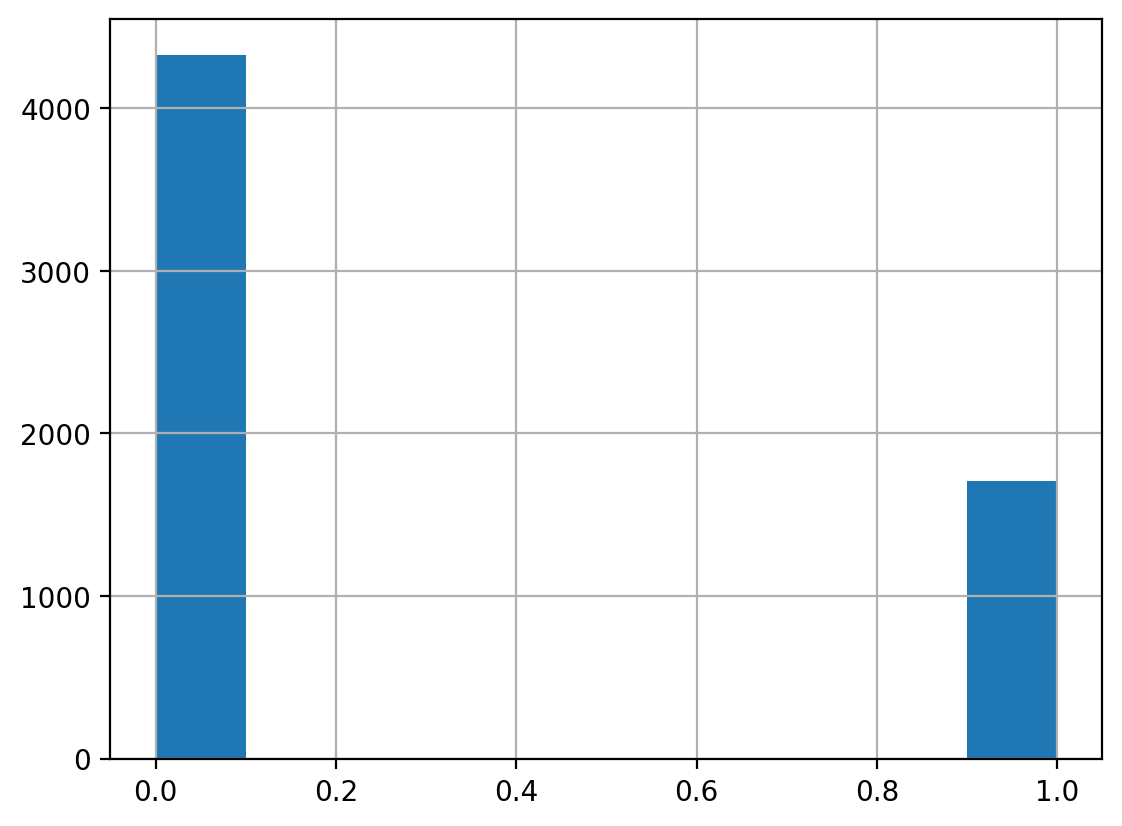

In [14]:
# Gender的情况
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 10
users2['Gender'].hist()
plt.show()

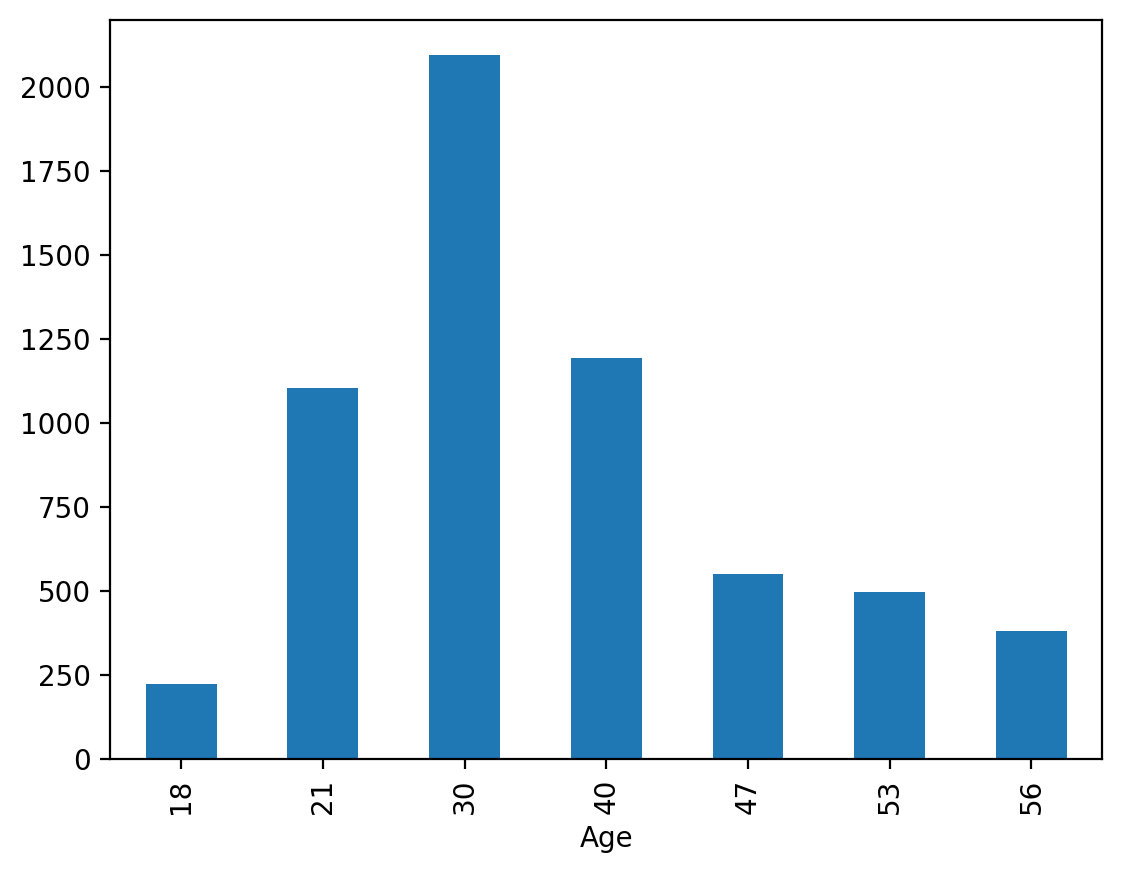

In [15]:
# Age的情况
u3_count = users2['Age'].value_counts()
u3_count.sort_index().plot(kind='bar')
plt.show()

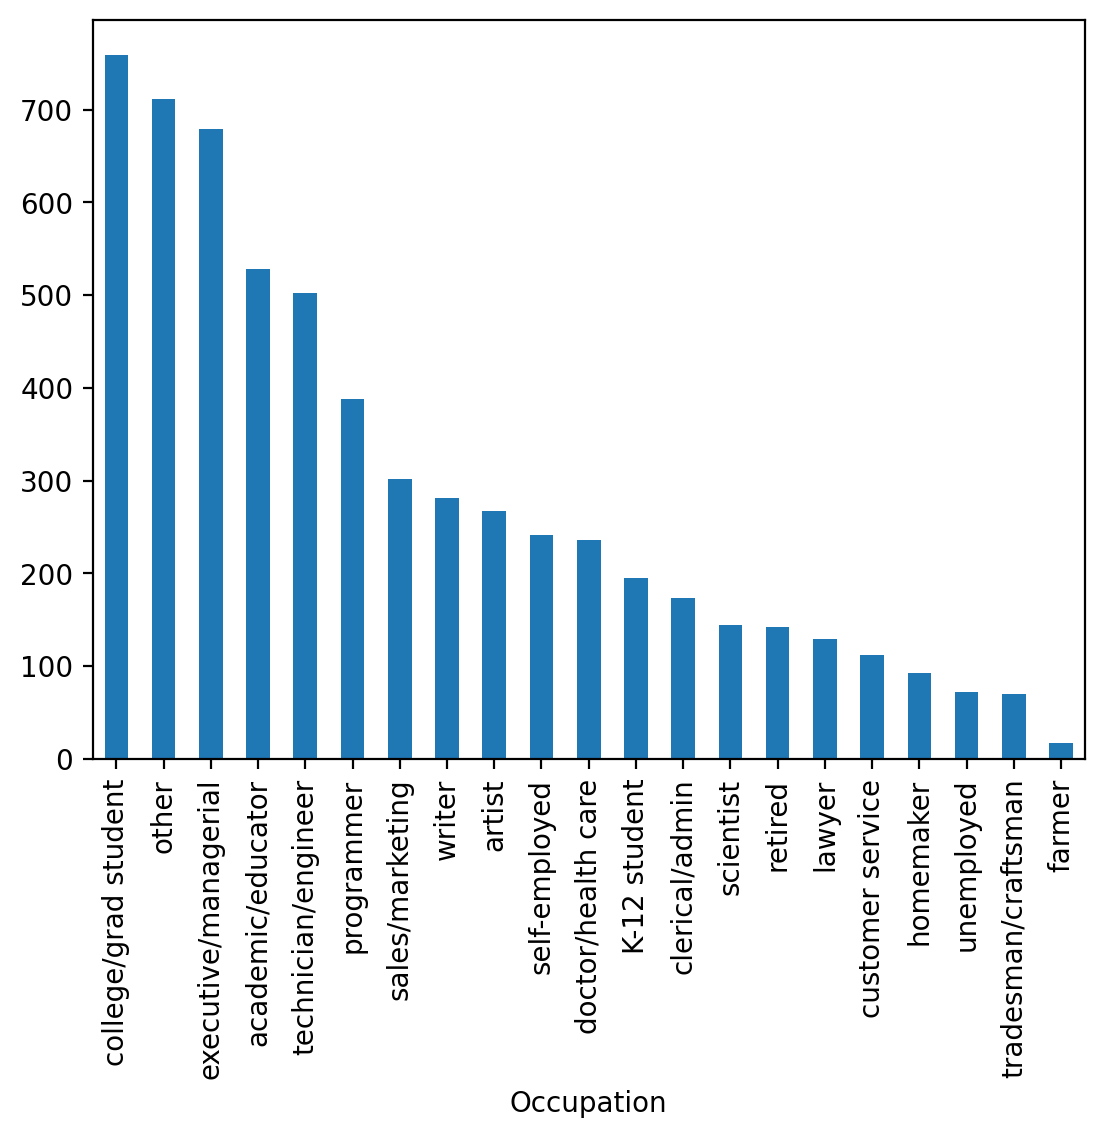

In [18]:
# Occupation的情况
users2['Occupation'].value_counts().plot(kind='bar')
plt.show()

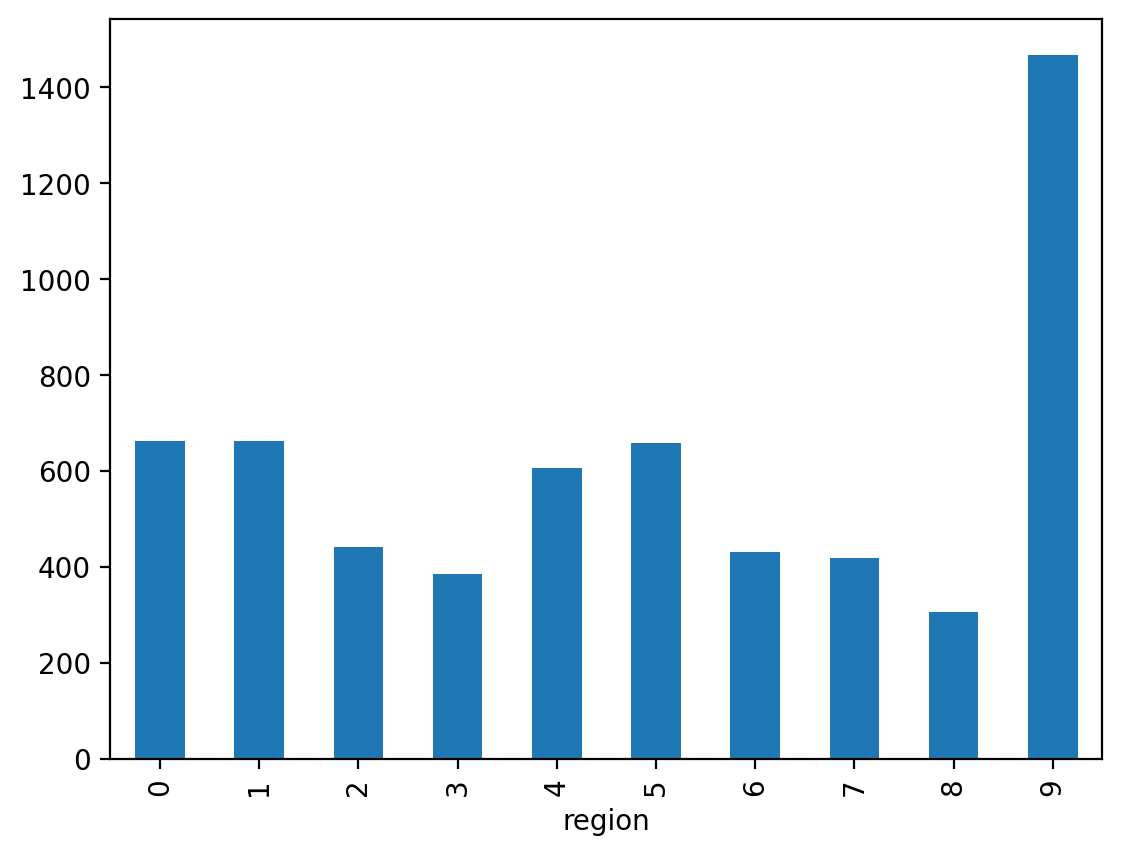

In [22]:
# region的情况
users2['region'].value_counts().sort_index().plot(kind='bar')
plt.show()

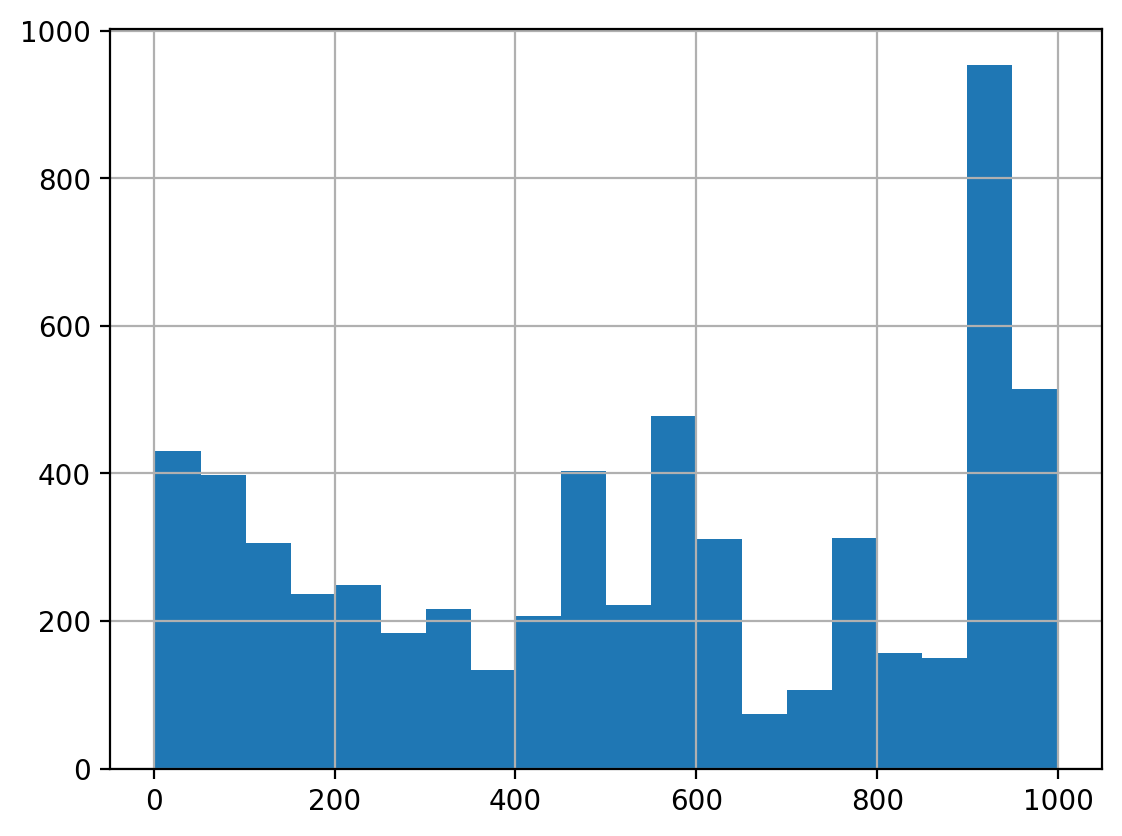

In [37]:
# state的情况
# users2['state'].value_counts().sort_index().plot(kind='bar')
users2['state'].hist(bins=20)
plt.show()

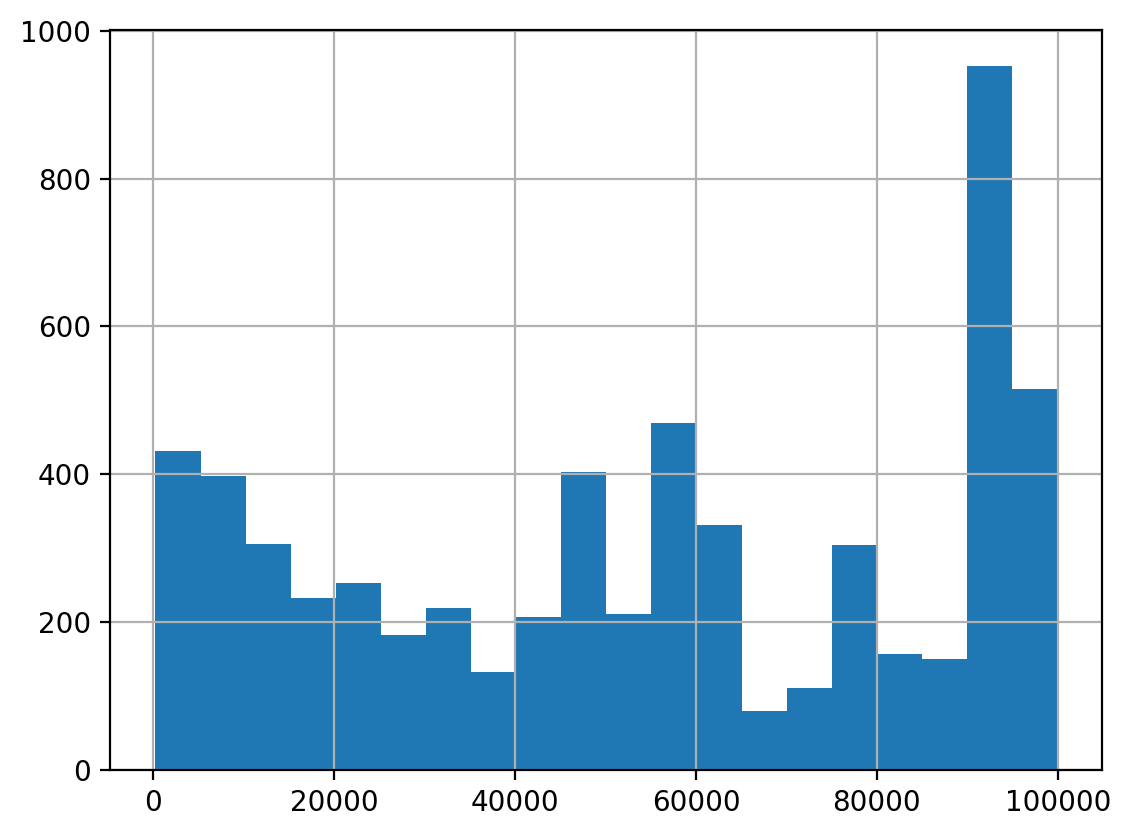

In [38]:
# city的情况
# users2['city'].value_counts().sort_index().plot(kind='bar')
users2['city'].hist(bins=20)
plt.show()

In [39]:
users2.to_csv("../temp/users.csv")